In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df['Kyphosis'] = df['Kyphosis'].map({'absent':0, 'present':1})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Kyphosis  81 non-null     int64
 1   Age       81 non-null     int64
 2   Number    81 non-null     int64
 3   Start     81 non-null     int64
dtypes: int64(4)
memory usage: 2.7 KB


C:\Users\X1 Yoga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


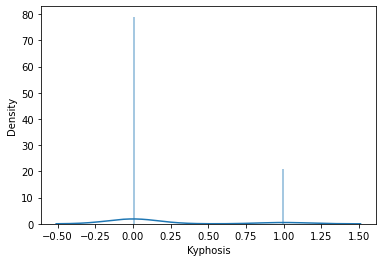

C:\Users\X1 Yoga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


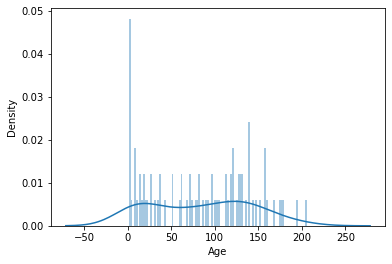

C:\Users\X1 Yoga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


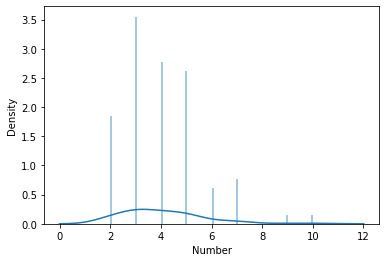

C:\Users\X1 Yoga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


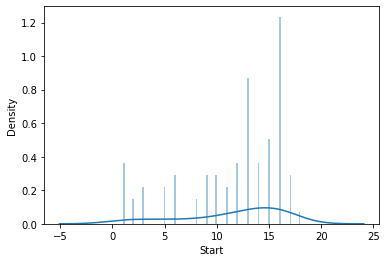

In [6]:
for i in df.columns:
    sns.distplot(df[i], bins = 100)
    plt.show()

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [8]:
X = df.drop('Kyphosis', axis = 1)

In [9]:
y = df['Kyphosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
model = DecisionTreeClassifier()

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
pred = model.predict(X_test)

In [15]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print(accuracy_score(y_test, pred))

[[15  3]
 [ 5  2]]


              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.40      0.29      0.33         7

    accuracy                           0.68        25
   macro avg       0.57      0.56      0.56        25
weighted avg       0.65      0.68      0.66        25



0.68


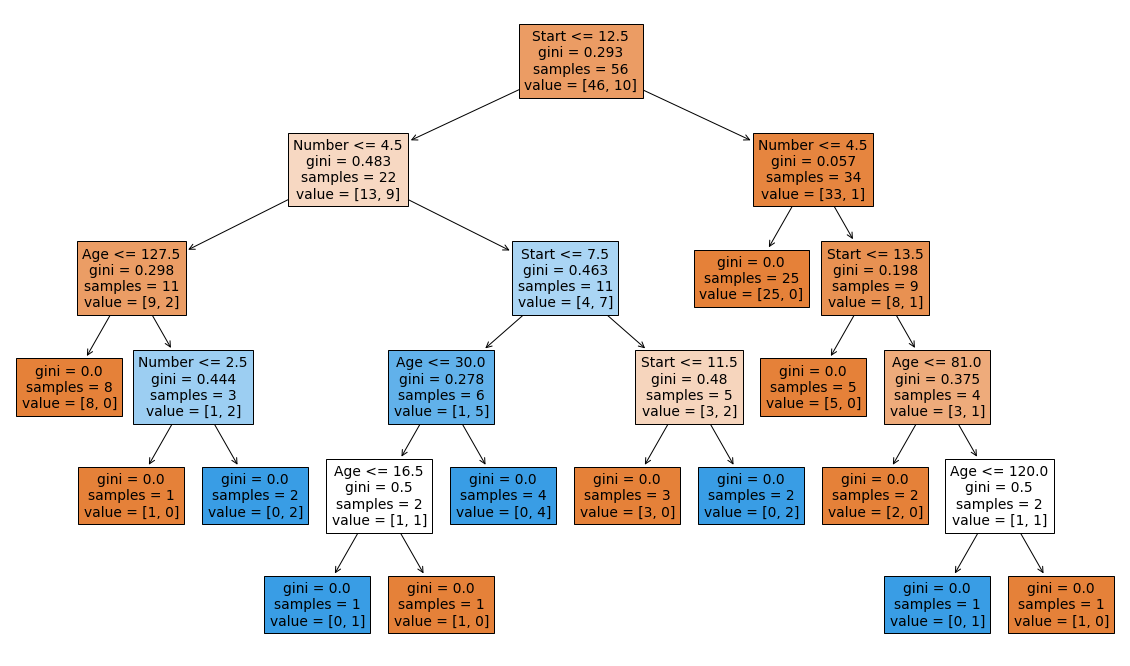

In [16]:
plt.figure(figsize = (20, 12))
_ = tree.plot_tree(model, feature_names= X.columns, filled = True)

In [17]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [18]:
from sklearn.model_selection import cross_val_score

In [41]:
np.mean(cross_val_score(model, X, y, scoring = 'f1_weighted', cv = 2))

0.7668827251693915

In [42]:
df['Kyphosis'].value_counts()

0    64
1    17
Name: Kyphosis, dtype: int64

In [61]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [54]:
params = {'criterion':["gini", "entropy"]}

In [63]:
mod = GridSearchCV(model, params, verbose=1, cv = StratifiedKFold()).fit(X, y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [66]:
mod.best_score_

0.7904411764705882